# Task # 3 - To Explore Unsupervised Machine Learning
# Problem Defination :
# From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.


# # Import library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns

In [5]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import datasets

# # load Iris data set

In [16]:
df = pd.read_csv("F:\Iris.csv")

In [17]:
# getting Data
df.head()# See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# # Data Preprocessing

In [19]:
# Descriptive analysis of data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [20]:
# Data type of variables
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [21]:
# Divide the data into inputs and labels

X= df.drop('Species',axis=1)
y = df['Species']


In [22]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


# # Visualization

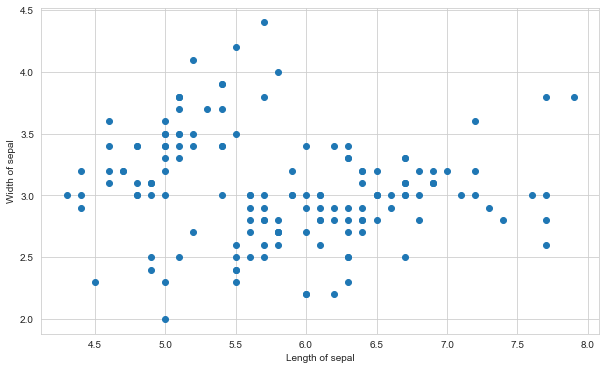

In [23]:
#Scatter plot

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.scatter(data=X,x='SepalLengthCm',y='SepalWidthCm')
plt.xlabel('Length of sepal')
plt.ylabel('Width of sepal');


# # Feature scaling


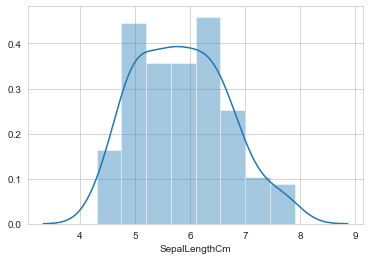

In [24]:
#Standardization of variables
sns.distplot(df['SepalLengthCm']);

# # here we can see above figure our data is normally distributed then we use the standardization method so we  used scaling the variables.


In [25]:
# Scale the variables

X_scaled = preprocessing.scale(X)
X_scaled[:10]

array([[-1.72054204, -0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.69744751, -1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.67435299, -1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.65125846, -1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.62816394, -1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-1.60506942, -0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.58197489, -1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.55888037, -1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.53578584, -1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.51269132, -1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

In [26]:
# Finding the optimum number of clusters for k-means classification
x = df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    


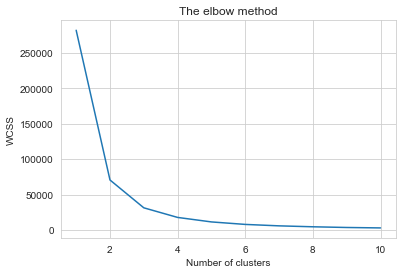

In [27]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [28]:

# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


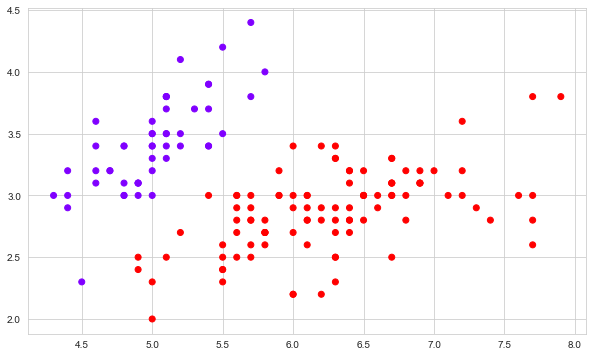

In [29]:
# second cluster

kmeans_2 = KMeans(2)
kmeans_2.fit(X_scaled)

cl_2 = X.copy()

cl_2['pred'] = kmeans_2.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(cl_2['SepalLengthCm'], cl_2['SepalWidthCm'], c= cl_2['pred'], cmap = 'rainbow');


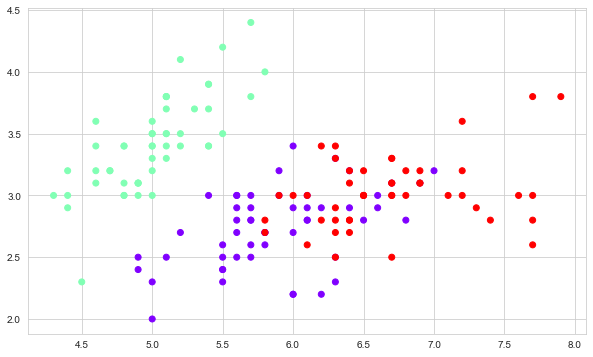

In [30]:
# 3 cluster

kmeans_3 = KMeans(3)
kmeans_3.fit(X_scaled)

cl_3 = X.copy()

cl_3['pred'] = kmeans_3.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(cl_3['SepalLengthCm'], cl_3['SepalWidthCm'], c= cl_3['pred'], cmap = 'rainbow');


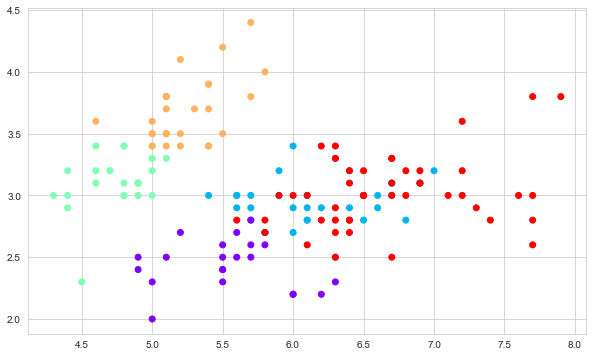

In [31]:
# 5 cluster

kmeans_5 = KMeans(5)
kmeans_5.fit(X_scaled)

cl_5 = X.copy()

cl_5['pred'] = kmeans_5.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(cl_5['SepalLengthCm'], cl_5['SepalWidthCm'], c= cl_5['pred'], cmap = 'rainbow');

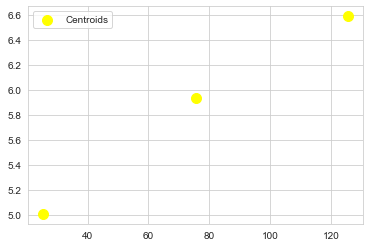

In [32]:
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()


# This is K-means workshop

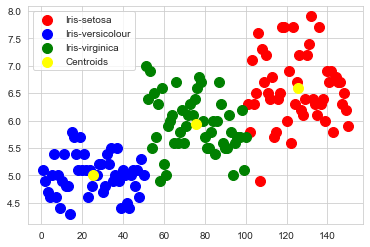

In [33]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()